# LIGO - Gravitational Waves Detectability

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import sys
sys.path.append(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\venv\Utilities")
from Utilities import plot_settings

Load downsampled data with balanced classes members

In [2]:
y = np.load('y_ds.npy')

In [3]:
data = np.load('data_ds.npy')

In [4]:
keys = np.load('keys.npy')

In [5]:
data.shape

(200000, 14)

Take a look at class balance

In [6]:
print('Classes ratio : ', y[y==1].shape[0]/y[y==0].shape[0])

Classes ratio :  1.0


In [7]:
data.mean(axis=1)

array([50.23096165, 63.72102237, 72.01031038, ..., 68.99139312,
       59.97464154, 21.57619155], shape=(200000,))

Data needs to be scaled first

In [8]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [9]:
S = StandardScaler().fit_transform(data)

## Dimensionality Reduction: PCA

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=S.shape[1])
P = pca.fit_transform(S)

Text(0, 0.5, 'Explained variance ratio')

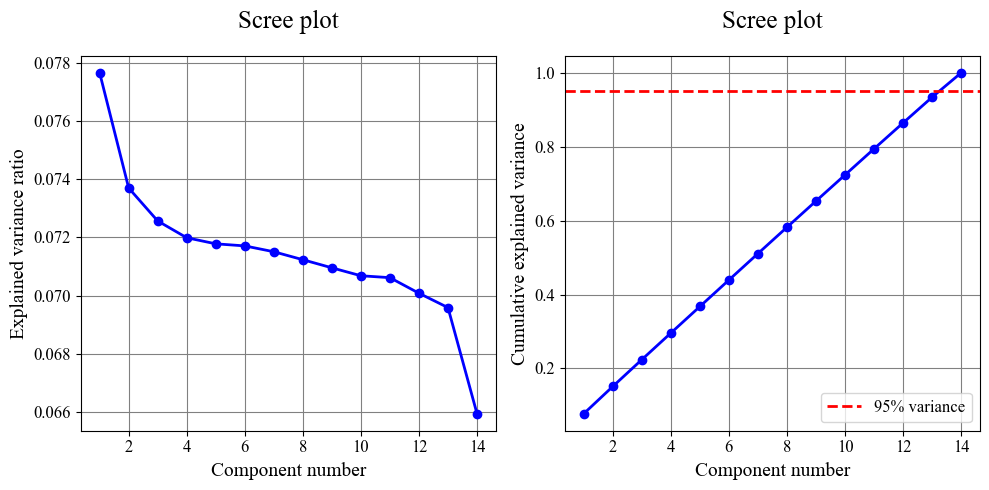

In [12]:
fig, axs = plt.subplots(1, 2)
axs[1].plot(range(1,S.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='blue')
axs[1].set_title('Scree plot')
axs[1].set_xlabel('Component number')
axs[1].axhline(0.95, 0, 1, linestyle='--', color='red', label='95% variance')
axs[1].set_ylabel('Cumulative explained variance')
axs[1].legend()

axs[0].plot(range(1,S.shape[1]+1), pca.explained_variance_ratio_, marker='o', linestyle='-', color='blue')
axs[0].set_title('Scree plot')
axs[0].set_xlabel('Component number')
axs[0].set_ylabel('Explained variance ratio')

This probably means that data correlation is highly non linear

## Supervised Classification: Linear Discriminant Analysis

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from Utilities.Classify_vs import evaluate_classifier_over_features, visualize_classification
from sklearn.model_selection import train_test_split

In [14]:
P_train, P_test, y_train, y_test = train_test_split(P, y, test_size=0.25, shuffle=True, stratify=y)

Computing predictions on feature  1
Computing predictions on feature  2
Computing predictions on feature  3
Computing predictions on feature  4
Computing predictions on feature  5
Computing predictions on feature  6
Computing predictions on feature  7
Computing predictions on feature  8
Computing predictions on feature  9
Computing predictions on feature  10
Computing predictions on feature  11
Computing predictions on feature  12
Computing predictions on feature  13
Computing predictions on feature  14
Computing completeness, contamination...
Plotting ROC...


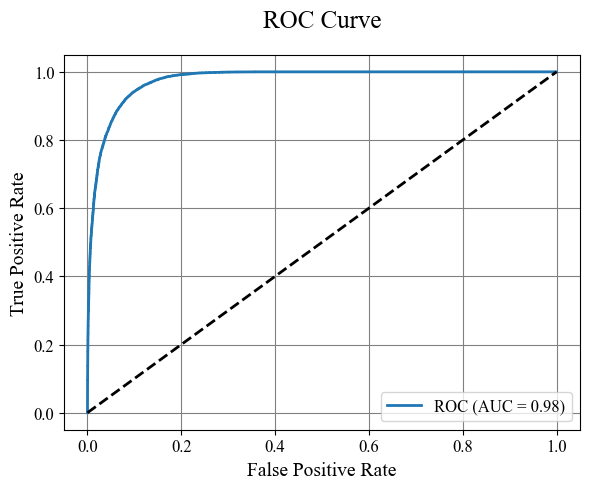

In [15]:
result = evaluate_classifier_over_features(P_train, P_test, y_train, y_test, LDA(), True)

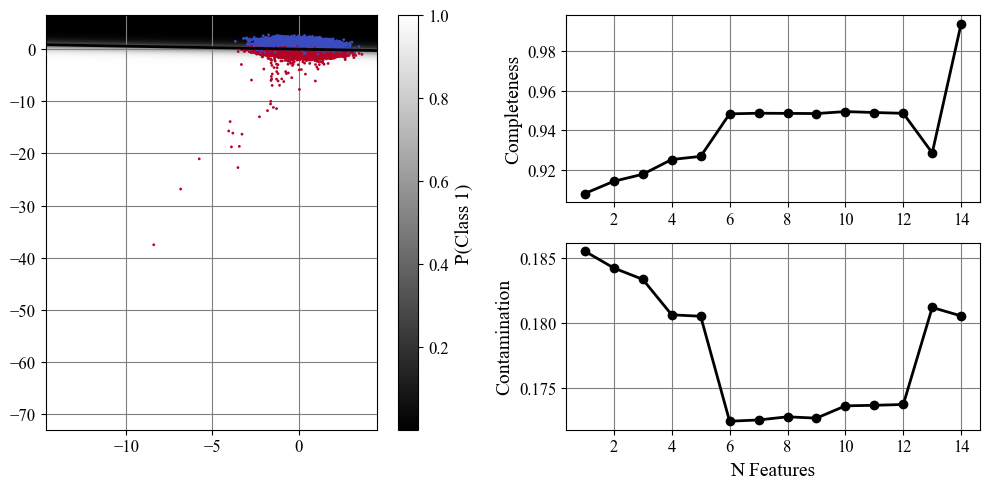

In [16]:
visualize_classification(P, y, result['classifiers'][1], result['completeness'], result['contamination'])

## Quadratic Discriminant Analysis

In [17]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

Computing predictions on feature  1
Computing predictions on feature  2
Computing predictions on feature  3
Computing predictions on feature  4
Computing predictions on feature  5
Computing predictions on feature  6
Computing predictions on feature  7
Computing predictions on feature  8
Computing predictions on feature  9
Computing predictions on feature  10
Computing predictions on feature  11
Computing predictions on feature  12
Computing predictions on feature  13
Computing predictions on feature  14


c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Computing completeness, contamination...
Plotting ROC...


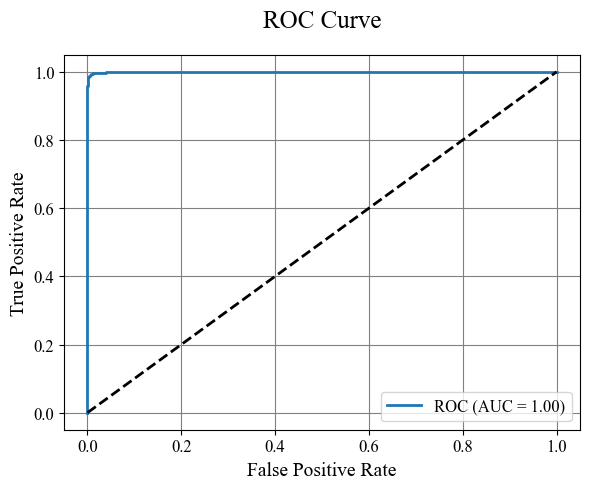

In [18]:
result = evaluate_classifier_over_features(P_train, P_test, y_train, y_test, QDA(), True)

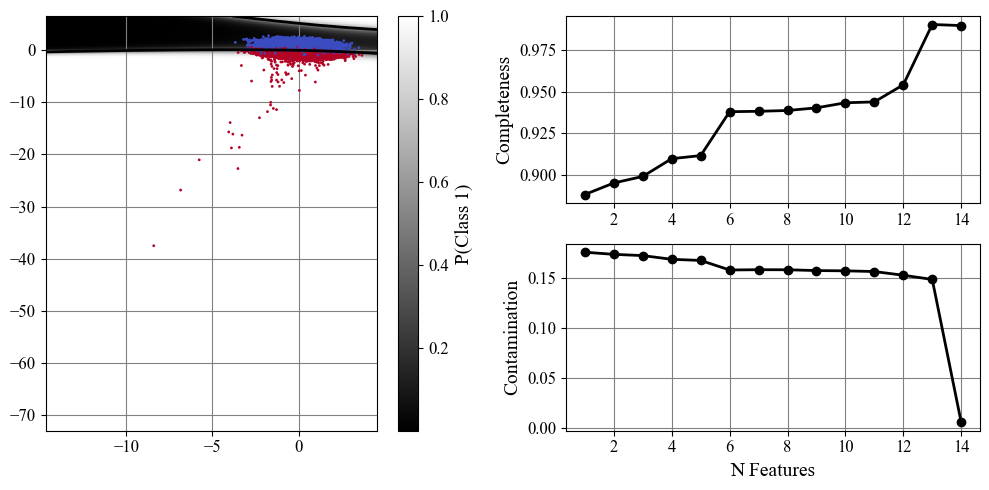

In [19]:
visualize_classification(P, y, result['classifiers'][1], result['completeness'], result['contamination'])

## GMM - Bayes

In [25]:
from astroML.classification import GMMBayes
from Utilities.Classify_vs import evaluate_gmm_classifier

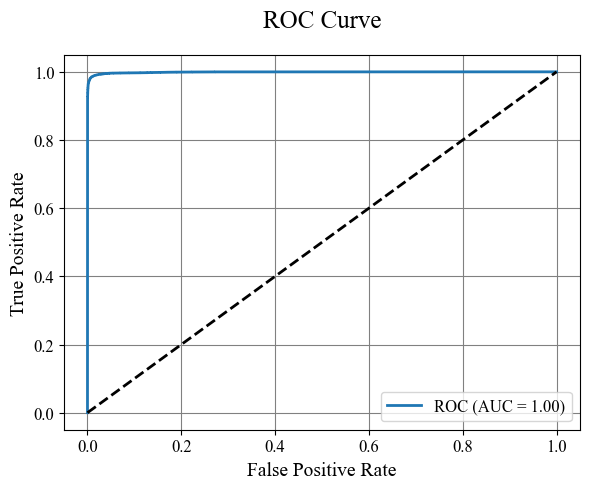

In [26]:
result = evaluate_gmm_classifier(P_train, P_test, y_train, y_test, GMMBayes, 2, True)

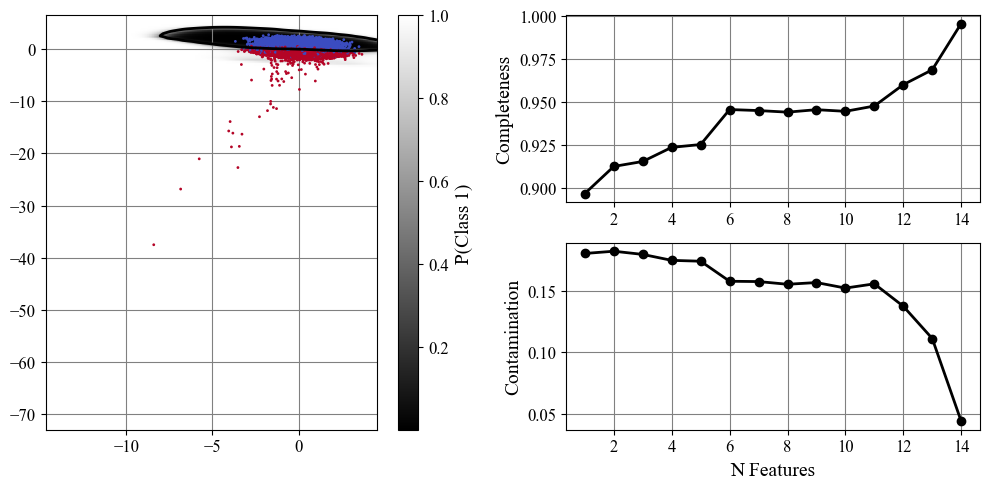

In [31]:
visualize_classification(P, y, result['classifiers'][1], result['completeness'], result['contamination'])

## KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier as KNC

Computing predictions on feature  1
Computing predictions on feature  2
Computing predictions on feature  3
Computing predictions on feature  4
Computing predictions on feature  5
Computing predictions on feature  6
Computing predictions on feature  7
Computing predictions on feature  8
Computing predictions on feature  9
Computing predictions on feature  10
Computing predictions on feature  11
Computing predictions on feature  12
Computing predictions on feature  13
Computing predictions on feature  14
Computing completeness, contamination...
Plotting ROC...


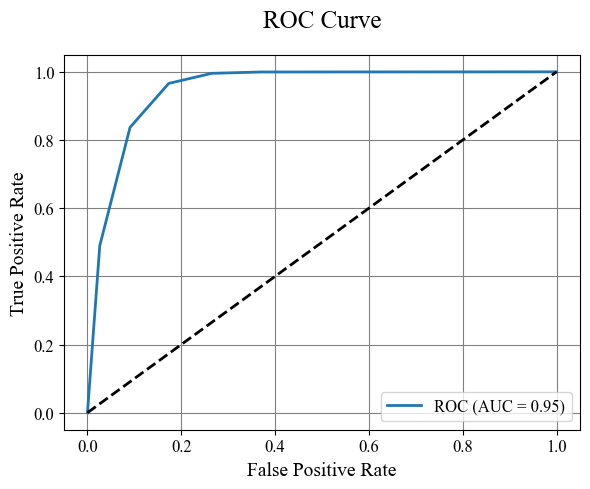

In [33]:
result = evaluate_classifier_over_features(P_train, P_test, y_train, y_test, KNC(), True)

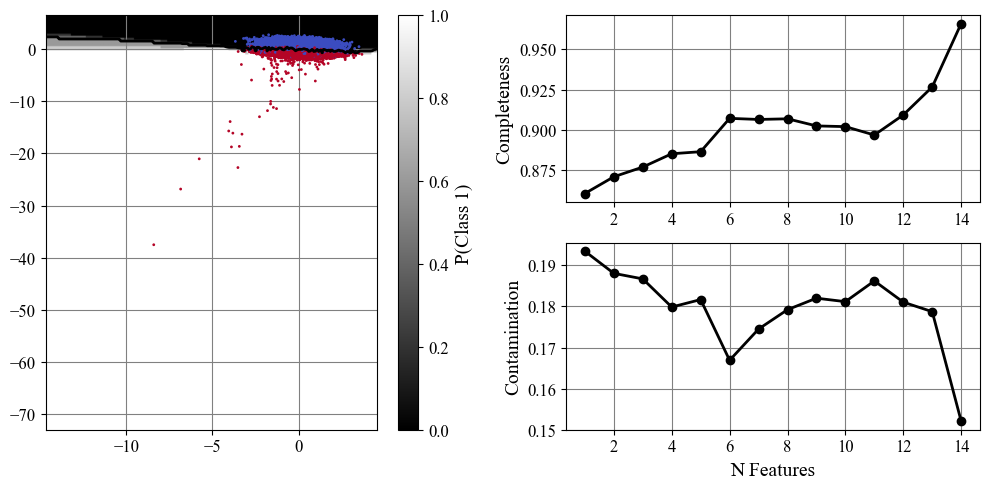

In [34]:
visualize_classification(P, y, result['classifiers'][1], result['completeness'], result['contamination'])